# 1. Obtaining data from the Internet

### First, navigate to the IPUMS USA website: https://usa.ipums.org/usa/index.shtml.

In [856]:
# Import required libraries
import numpy as np
import pandas as pd

# Display all columns in pandas
pd.set_option('display.max_columns', None)

# 2. Preparing and Cleaning that data

In [857]:
# Load the data
acs_data = pd.read_csv('usa_00001.csv')
acs_data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,NCHILD,NCHLT5,SEX,AGE,MARST,RACE,RACED,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD
0,2019,201901,658,2019010040132,3096.0,2019000006581,200001,4,1,3096.0,0,0,1,49,6,1,100,0,0,2,26,1,10,1700,1,11
1,2019,201901,968,2019010060553,13312.8,2019000009681,270201,4,1,13312.8,0,0,1,21,6,2,200,0,0,7,71,1,10,12200,1,11
2,2019,201901,2516,2019000008356,13312.8,2019000025161,240001,1,2,12384.0,2,2,1,26,6,1,100,4,416,6,63,1,10,40000,1,11
3,2019,201901,2670,2019000020711,11300.4,2019000026701,100001,1,2,23529.6,0,0,1,36,6,1,100,0,0,4,40,1,10,30000,1,11
4,2019,201901,2670,2019000020711,11300.4,2019000026701,100001,1,3,23374.8,0,0,1,35,6,1,100,0,0,4,40,1,10,18200,1,11


## A overview about converting Education var

### a) Education - We have a categorical measurement of education (educd). For some of our analysis, we need a continuous variable. Use the educd variable to create a continuous measure of education called educdc using the crosswalk

In [858]:
# Check unique values in EDUCD
acs_data['EDUCD'].unique()

array([ 26,  71,  63,  40, 114,  81,  30,  25,  64, 101,  65,  50,   2,
       115, 116,  61,  22,  23,  15,  17,  16,  14,  12,  11])

In [859]:
crosswalk = pd.read_csv('PPHA_30545_MP01-Crosswalk.csv')
crosswalk.head()

,educd,educdc
0,2,0.0
1,10,0.0
2,11,2.0
3,12,0.0
4,13,2.5


In [860]:
# Transform data to convert to dictionary
crosswalk = crosswalk.set_index('educd').T
crosswalk

educd,2,10,11,12,13,14,15,16,17,20,21,22,23,24,25,26,30,40,50,61,62,63,64,65,70,71,80,81,82,83,90,100,101,110,111,112,113,114,115,116
educdc,0.0,0.0,2.0,0.0,2.5,1.0,2.0,3.0,4.0,6.5,5.5,5.0,6.0,7.5,7.0,8.0,9.0,10.0,11.0,12.0,12.0,12.0,12.0,13.0,13.0,14.0,14.0,14.0,14.0,14.0,15.0,16.0,16.0,17.0,18.0,19.0,20.0,18.0,18.0,22.0


In [861]:
# convert cw to dictionary (the parameter 'to list' ensures that the column names above our keys)
crosswalk.to_dict('list')

{2: [0.0],
 10: [0.0],
 11: [2.0],
 12: [0.0],
 13: [2.5],
 14: [1.0],
 15: [2.0],
 16: [3.0],
 17: [4.0],
 20: [6.5],
 21: [5.5],
 22: [5.0],
 23: [6.0],
 24: [7.5],
 25: [7.0],
 26: [8.0],
 30: [9.0],
 40: [10.0],
 50: [11.0],
 61: [12.0],
 62: [12.0],
 63: [12.0],
 64: [12.0],
 65: [13.0],
 70: [13.0],
 71: [14.0],
 80: [14.0],
 81: [14.0],
 82: [14.0],
 83: [14.0],
 90: [15.0],
 100: [16.0],
 101: [16.0],
 110: [17.0],
 111: [18.0],
 112: [19.0],
 113: [20.0],
 114: [18.0],
 115: [18.0],
 116: [22.0]}

In [862]:
# Duplicate the EDUCD column to create EDUCDC column
acs_data['EDUCDC'] = acs_data['EDUCD']

In [863]:
# Map values from the dictionary we created
acs_data = acs_data.replace({'EDUCDC': crosswalk})

# Verify
acs_data[['EDUCD', 'EDUCDC']].head(10)

,EDUCD,EDUCDC
0,26,8.0
1,71,14.0
2,63,12.0
3,40,10.0
4,40,10.0
5,114,18.0
6,81,14.0
7,81,14.0
8,63,12.0
9,30,9.0


In [864]:
crosswalk = pd.read_csv('PPHA_30545_MP01-Crosswalk.csv') 
acs_data = acs_data.merge(crosswalk, left_on='EDUCD', right_on='educd')
acs_data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,NCHILD,NCHLT5,SEX,AGE,MARST,RACE,RACED,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,EDUCDC,educd,educdc
0,2019,201901,658,2019010040132,3096.0,2019000006581,200001,4,1,3096.0,0,0,1,49,6,1,100,0,0,2,26,1,10,1700,1,11,8.0,26,8.0
1,2019,201901,18460,2019001119914,17647.2,2019000184601,50001,1,1,17647.2,0,0,2,51,5,1,100,0,0,2,26,1,10,15000,1,11,8.0,26,8.0
2,2019,201901,48646,2019001015243,9288.0,2019000486461,80504,2,3,12848.4,0,0,1,21,6,7,700,1,100,2,26,1,10,14000,1,11,8.0,26,8.0
3,2019,201901,102981,2019000172057,25696.8,2019001029811,371206,1,1,25542.0,0,0,2,40,4,7,700,4,416,2,26,1,10,0,1,11,8.0,26,8.0
4,2019,201901,115520,2019000302438,13158.0,2019001155201,730206,1,1,13158.0,1,0,1,50,1,1,100,1,100,2,26,1,10,37500,1,11,8.0,26,8.0


## Convert VET, white and black to dummy

### b) Dummy Variables - Create the following dummy variables:

A dummy, vet, equal to 1 if the individual is a veteran.

In [865]:
# Check the unqique values
acs_data['VETSTAT'].unique()
# 2 means a vet, 1 means not

array([1, 2])

In [866]:
acs_data['VET'] = np.where(acs_data['VETSTAT'] == 2, 1, 0)

A dummy, white, equal to 1 if the individual is white

A dummy, black, equal to 1 if the individual is black

In [867]:
# Whites are 1, Blacks are 2
acs_data['White'] = np.where(acs_data['RACE'] == 1, 1, 0)
acs_data['Black'] = np.where(acs_data['RACE'] == 2, 1, 0)

In [868]:
acs_data['MAR'] = np.where(
    (acs_data['MARST'] == 1) | (acs_data['MARST'] == 2),
    1,
    0
)

# MARST = 1, 2 implies married. Not being married has been set as the reference. 

In [869]:
acs_data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,NCHILD,NCHLT5,SEX,AGE,MARST,RACE,RACED,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,EDUCDC,educd,educdc,VET,White,Black,MAR
0,2019,201901,658,2019010040132,3096.0,2019000006581,200001,4,1,3096.0,0,0,1,49,6,1,100,0,0,2,26,1,10,1700,1,11,8.0,26,8.0,0,1,0,0
1,2019,201901,18460,2019001119914,17647.2,2019000184601,50001,1,1,17647.2,0,0,2,51,5,1,100,0,0,2,26,1,10,15000,1,11,8.0,26,8.0,0,1,0,0
2,2019,201901,48646,2019001015243,9288.0,2019000486461,80504,2,3,12848.4,0,0,1,21,6,7,700,1,100,2,26,1,10,14000,1,11,8.0,26,8.0,0,0,0,0
3,2019,201901,102981,2019000172057,25696.8,2019001029811,371206,1,1,25542.0,0,0,2,40,4,7,700,4,416,2,26,1,10,0,1,11,8.0,26,8.0,0,0,0,0
4,2019,201901,115520,2019000302438,13158.0,2019001155201,730206,1,1,13158.0,1,0,1,50,1,1,100,1,100,2,26,1,10,37500,1,11,8.0,26,8.0,0,1,0,1


### d) Create Variables: The natural log of incwage

In [870]:
# We first drop those with 0 income. This is because ln(0) is undefined
acs_data = acs_data[acs_data.INCWAGE != 0]
acs_data['INCWAGE_log'] = np.log(acs_data['INCWAGE'])

In [871]:
acs_data[['INCWAGE','INCWAGE_log']].head(10)

,INCWAGE,INCWAGE_log
0,1700,7.438384
1,15000,9.615805
2,14000,9.546813
4,37500,10.532096
5,26400,10.181119
6,30000,10.308953
7,25000,10.126631
8,18000,9.798127
9,29000,10.275051
10,21000,9.952278


## Create an INCWAGE squared variable

In [872]:
acs_data['INCWAGESQ'] = np.power(acs_data['INCWAGE'], 2)
acs_data.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,NCHILD,NCHLT5,SEX,AGE,MARST,RACE,RACED,HISPAN,HISPAND,EDUC,EDUCD,EMPSTAT,EMPSTATD,INCWAGE,VETSTAT,VETSTATD,EDUCDC,educd,educdc,VET,White,Black,MAR,INCWAGE_log,INCWAGESQ
0,2019,201901,658,2019010040132,3096.0,2019000006581,200001,4,1,3096.0,0,0,1,49,6,1,100,0,0,2,26,1,10,1700,1,11,8.0,26,8.0,0,1,0,0,7.438384,2890000
1,2019,201901,18460,2019001119914,17647.2,2019000184601,50001,1,1,17647.2,0,0,2,51,5,1,100,0,0,2,26,1,10,15000,1,11,8.0,26,8.0,0,1,0,0,9.615805,225000000
2,2019,201901,48646,2019001015243,9288.0,2019000486461,80504,2,3,12848.4,0,0,1,21,6,7,700,1,100,2,26,1,10,14000,1,11,8.0,26,8.0,0,0,0,0,9.546813,196000000
4,2019,201901,115520,2019000302438,13158.0,2019001155201,730206,1,1,13158.0,1,0,1,50,1,1,100,1,100,2,26,1,10,37500,1,11,8.0,26,8.0,0,1,0,1,10.532096,1406250000
5,2019,201901,183322,2019001010122,31734.0,2019001833221,830206,1,2,39783.6,2,1,1,28,1,1,100,1,100,2,26,1,12,26400,1,11,8.0,26,8.0,0,1,0,1,10.181119,696960000


# 3. Performing data analysis and answering questions.

## Summary statistic (mean, sd) for age variable only

In [873]:
acs_data.columns

Index(['YEAR', 'SAMPLE', 'SERIAL', 'CBSERIAL', 'HHWT', 'CLUSTER', 'STRATA',
       'GQ', 'PERNUM', 'PERWT', 'NCHILD', 'NCHLT5', 'SEX', 'AGE', 'MARST',
       'RACE', 'RACED', 'HISPAN', 'HISPAND', 'EDUC', 'EDUCD', 'EMPSTAT',
       'EMPSTATD', 'INCWAGE', 'VETSTAT', 'VETSTATD', 'EDUCDC', 'educd',
       'educdc', 'VET', 'White', 'Black', 'MAR', 'INCWAGE_log', 'INCWAGESQ'],
      dtype='object')

In [874]:
acs_data['AGE'].describe()

count    8800.000000
mean       41.740909
std        13.299873
min        18.000000
25%        30.000000
50%        42.000000
75%        53.000000
max        65.000000
Name: AGE, dtype: float64

In [875]:
acs_data['AGE'].mean()

41.74090909090909

In [876]:
acs_data['AGE'].std()

13.299872518768277

## scatterplot for age vs income

In [877]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Income (dollars)')

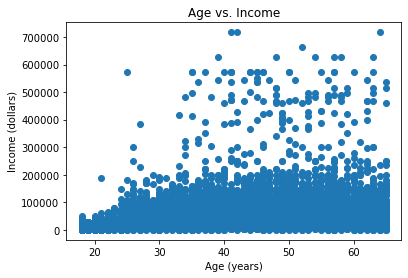

In [878]:
plt.scatter(acs_data['AGE'], acs_data['INCWAGE'])
plt.title('Age vs. Income')
plt.xlabel('Age (years)')
plt.ylabel('Income (dollars)')

Text(0, 0.5, 'Income (dollars)')

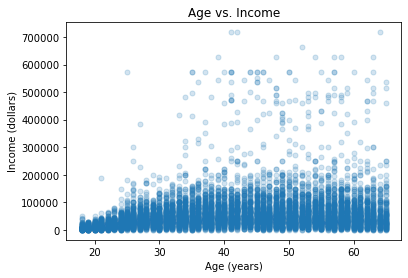

In [879]:
plt.scatter(acs_data['AGE'], acs_data['INCWAGE'], alpha=0.2, s=25) 
#The alpha blending value, between 0 (transparent) and 1 (opaque)
#scalar or array_like, shape (n, ), optional
#The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.
plt.title('Age vs. Income')
plt.xlabel('Age (years)')
plt.ylabel('Income (dollars)')

Text(0, 0.5, 'Income (dollars)')

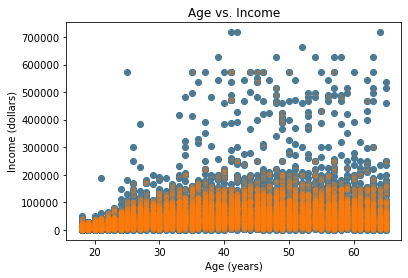

In [880]:
# import matplotlib.pyplot as plt

plt.scatter(acs_data['AGE'], acs_data['INCWAGE'])
plt.title('Age vs. Income')
plt.xlabel('Age (years)')
plt.ylabel('Income (dollars)')

plt.scatter(acs_data['AGE'], acs_data['INCWAGE'], alpha=0.2, s=25)
plt.title('Age vs. Income')
plt.xlabel('Age (years)')
plt.ylabel('Income (dollars)')# scatterplot for age vs income


## Regressing income only on age and martial status

In [881]:
import statsmodels.formula.api as smf
result = smf.ols('INCWAGE ~ AGE + MAR', data = acs_data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                INCWAGE   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     338.1
Date:                Thu, 19 Jan 2023   Prob (F-statistic):          3.29e-142
Time:                        13:03:56   Log-Likelihood:            -1.1021e+05
No. Observations:                8800   AIC:                         2.204e+05
Df Residuals:                    8797   BIC:                         2.204e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.172e+04   2335.360      5.018      0.0

In [882]:
# There are several possible approaches to encode categorical values, and statsmodels has built-in support
# for many of them. In general these work by splitting a categorical variable into many different binary variables. 
# The simplest way to encode categoricals is “dummy-encoding” which encodes a k-level categorical variable into k-1 
# binary variables. In statsmodels this is done easily using the C() function.

## Predictions

In [883]:
dat = acs_data.loc[
    (acs_data['MAR'] == 1) & (acs_data['AGE'] == 40)
]
predictions = result.get_prediction(dat)

predictions.summary_frame(alpha=0.05)[:1]
# Expectation for a 40-year-old married individual 

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,67956.884241,1004.126899,65988.560865,69925.207617,-62412.19575,198325.964232


In [884]:
# alpha : significance level for the confidence interval.
# The default returns a 95% confidence interval.